# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the Data set

#### TRAIN_DATA

In [2]:
train_data = pd.read_csv("C:/Users/Hi/OneDrive/Documents/ML_PROJECTS_DATA/train.csv")

### Check for multicolinearity

<Axes: >

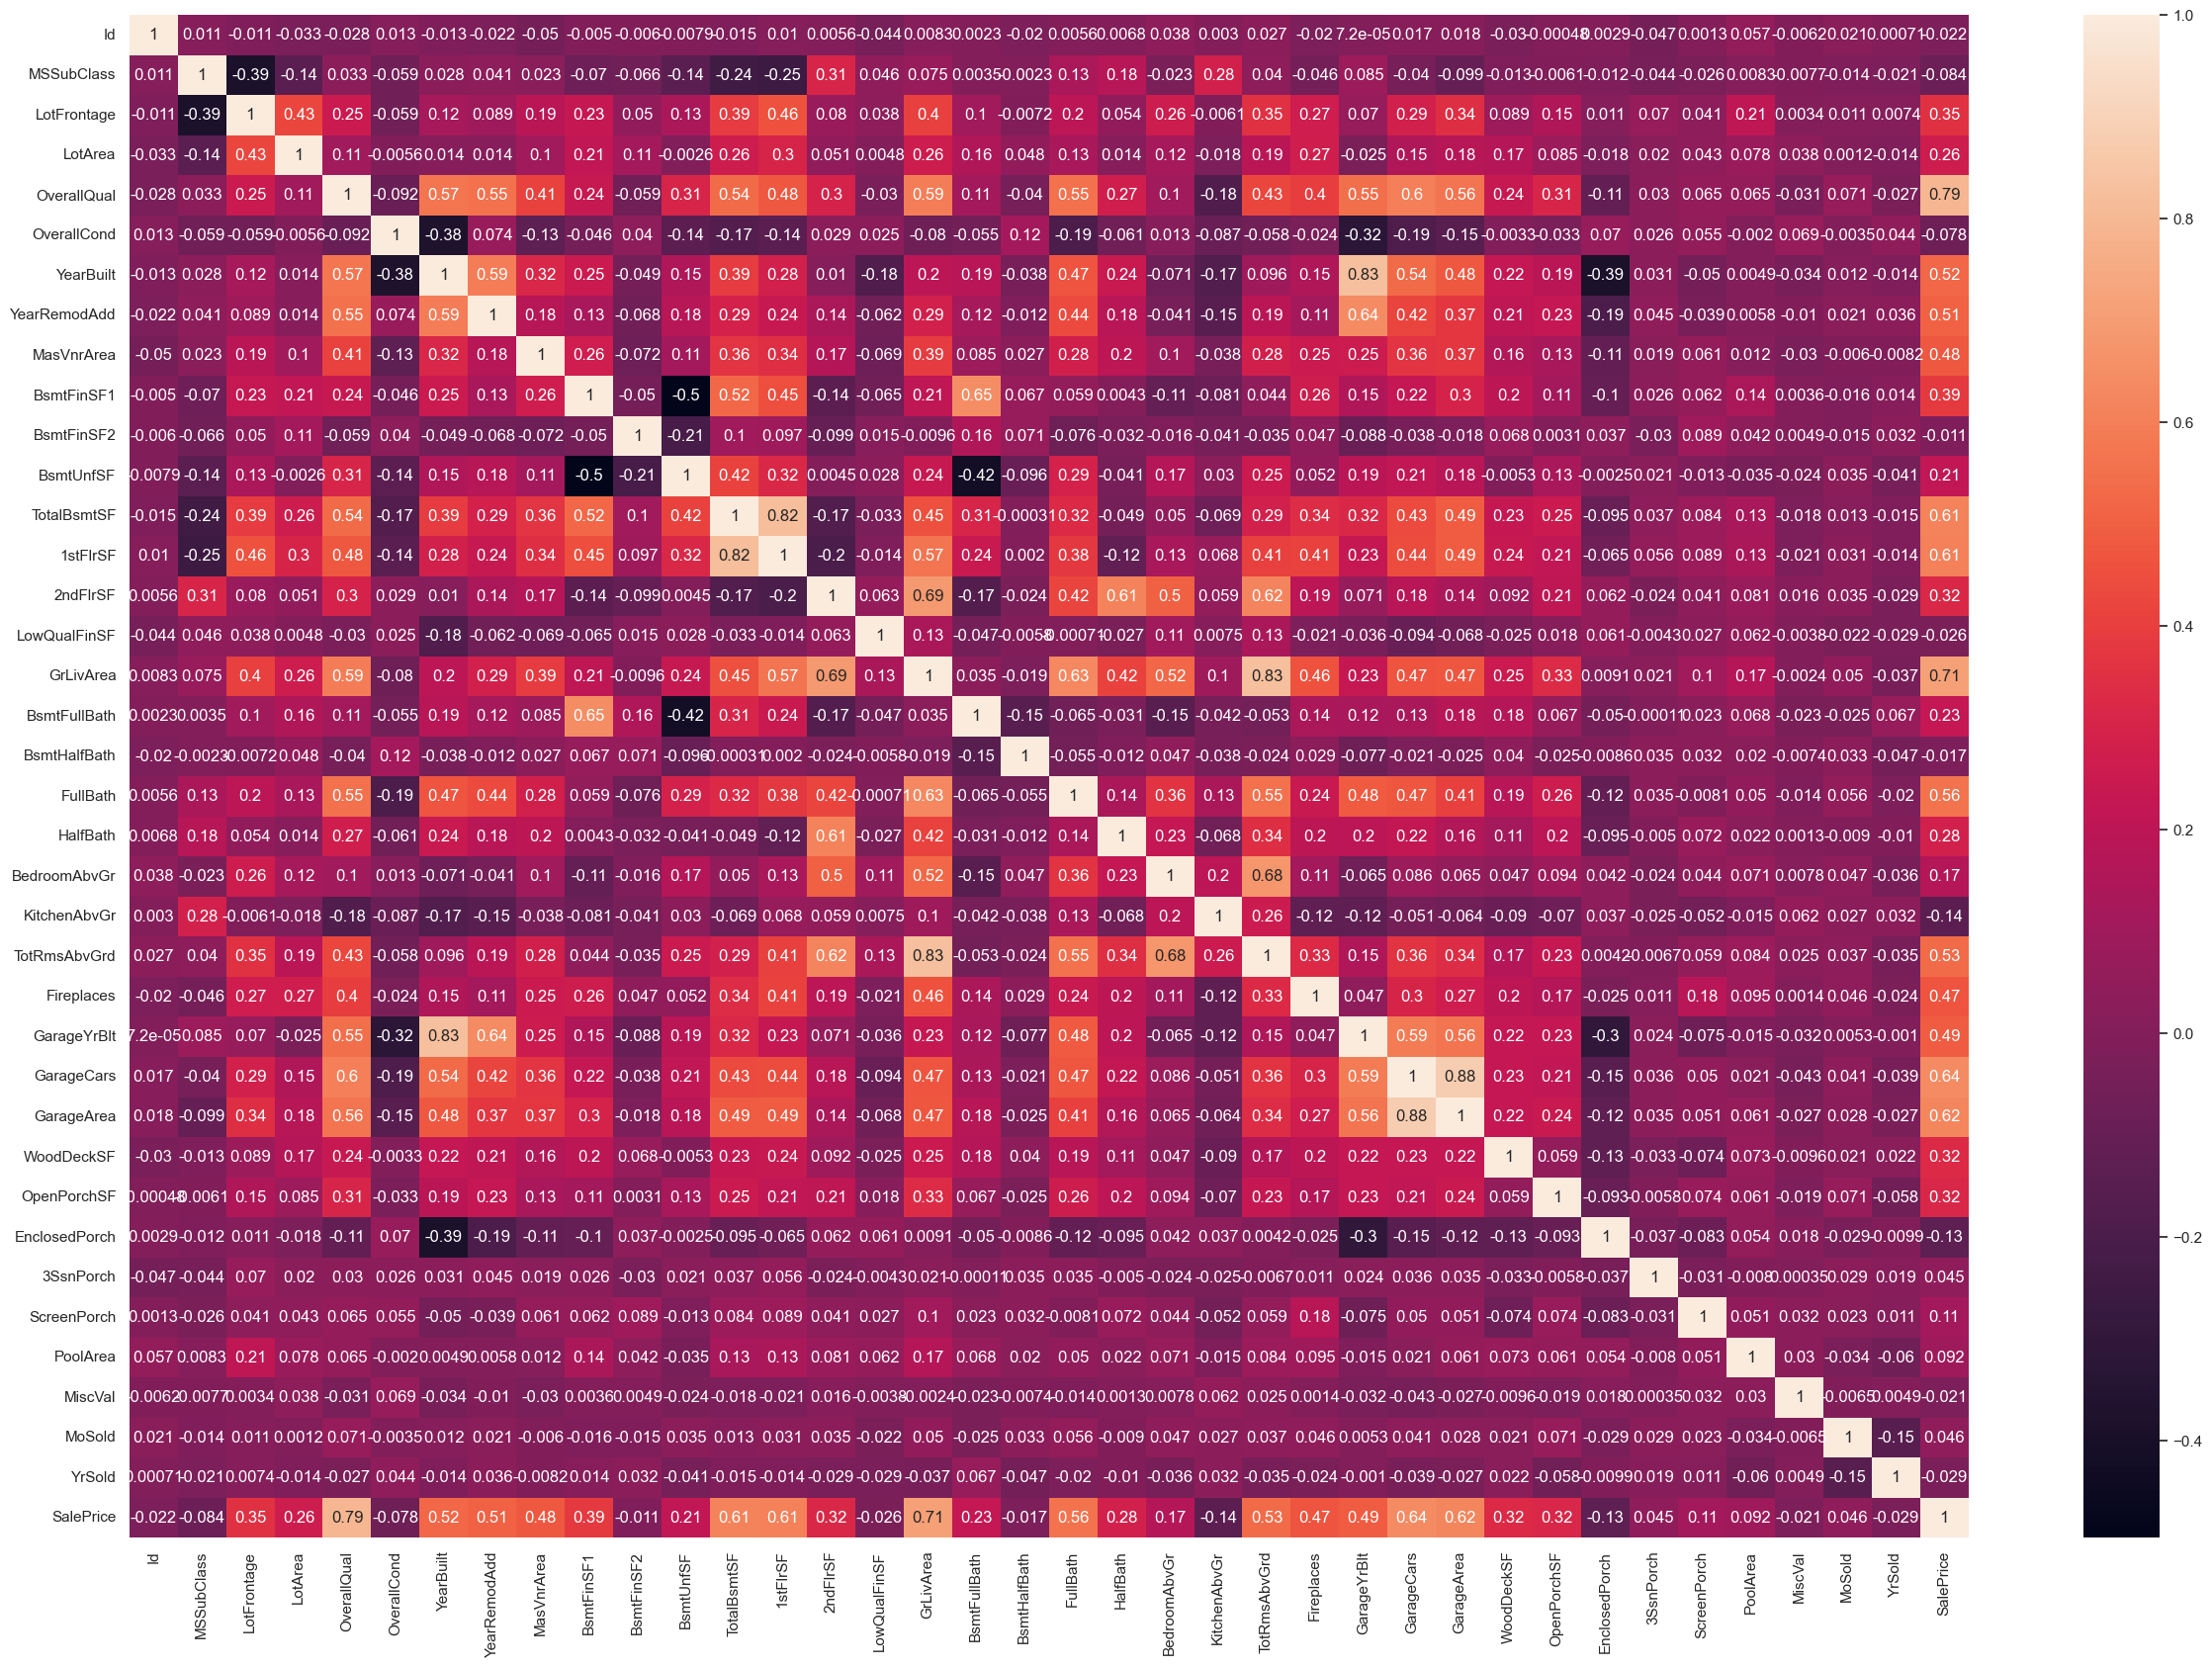

In [3]:
plt.figure(figsize = (30,20))

sns.heatmap(train_data.corr(),annot = True)

In [4]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [6]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [9]:
## threshold--Domain expertise
corr_features=correlation(train_data,0.75)

In [10]:
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

### TEST DATA

In [11]:
test_data = pd.read_csv("C:/Users/Hi/OneDrive/Documents/ML_PROJECTS_DATA/test.csv")

In [12]:
## threshold--Domain expertise
corr_features=correlation(test_data,0.75)
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', 'YrSold'}

In [13]:
train_data['data'] = 'train'
test_data['data'] = 'test'

In [14]:
print(train_data.shape, test_data.shape)

(1460, 82) (1459, 81)


In [15]:
## concatination of the test and train data

all_data = pd.concat([train_data, test_data], axis=0)

In [16]:
all_data.shape

(2919, 82)

In [ ]:
### DROP FEATURES WHEN CORRELATION IS MORE THAN 0.75

In [11]:
1460+1459

2919

In [12]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


## Preprocessing

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [14]:
for i in all_data.columns:
    print("************************",i,"*****************")
    print()
    print(set(all_data[i].tolist()))
    print()

************************ Id *****************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

# Handling Missing values

In [15]:
all_data.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
dtype: int64

In [16]:
## Alley
2721/2919*100

93.21685508735868

In [17]:
#LotFrontage
486/2919*100

16.649537512846866

In [18]:
#FireplaceQu
1420/2919*100

48.646796848235695

In [19]:
#PoolQC
2909/2919*100

99.65741692360398

In [20]:
#Fence
2348/2919*100

80.4385063377869

In [21]:
#MiscFeature
2814/2919*100

96.40287769784173

In [22]:
all_data.isnull().sum().tail(41)

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2909
Fence            2348
MiscFeature      2814
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
data                0
dtype: int64

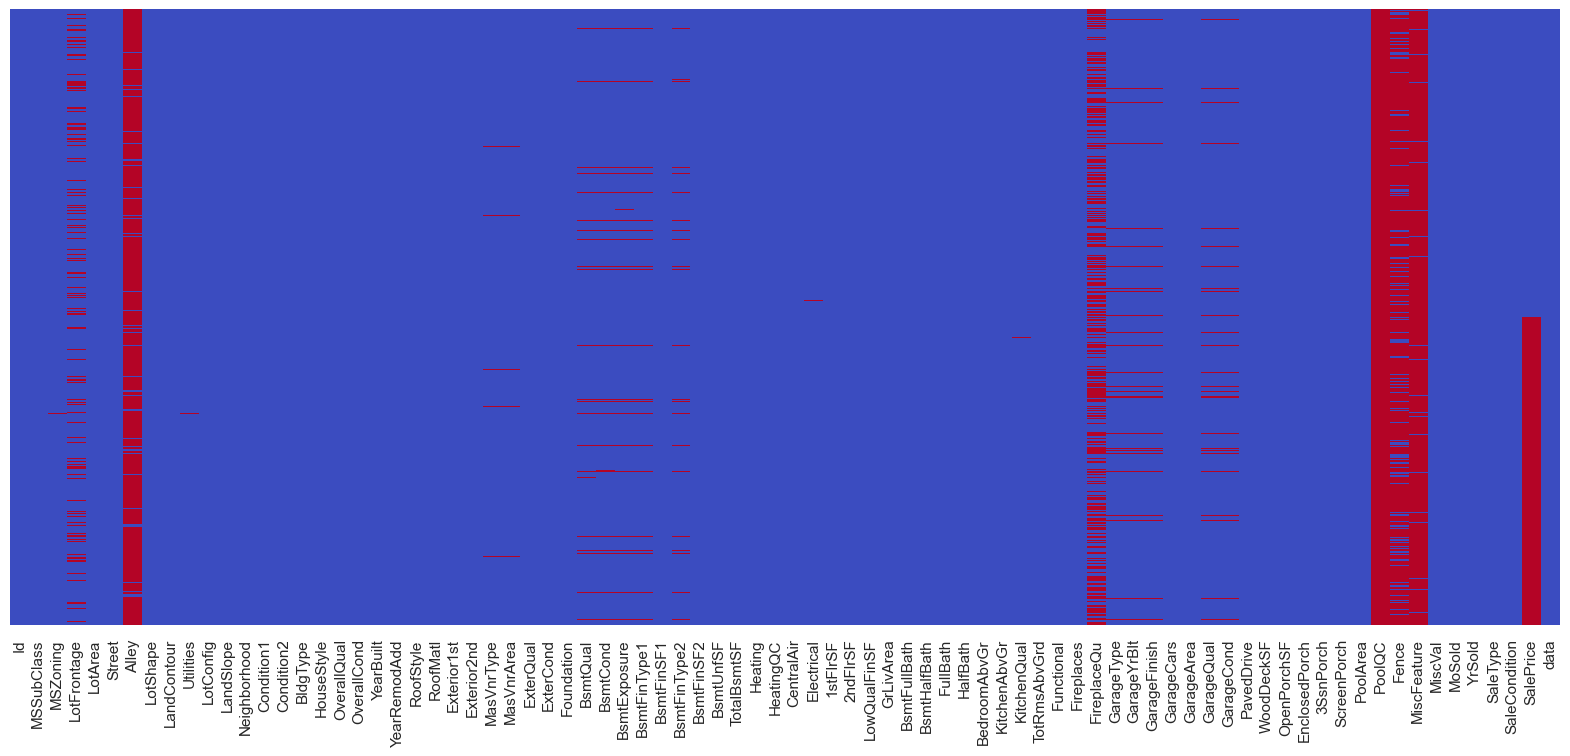

In [23]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(20,8))
sns.heatmap(all_data.isnull(), cbar=False, cmap='coolwarm',yticklabels=False)
plt.show()

In [24]:
# Dropping columns with more than 25% missing value
all_data1 = all_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [25]:
# LotFrontage
# BsmtQual          37
# BsmtCond          37
# BsmtExposure      38
# BsmtFinType1      37
# Electrical 
# BsmtFinType2  
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
        
# GarageQual         81
# MasVnrType         8
# MasVnrArea  

In [26]:
# Let's check the number of outliers per columns

Q1 = all_data1.quantile(0.25)
Q3 = all_data1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [27]:
((all_data1 > UL) | (all_data1 < LL)).sum().head(40)

1stFlrSF          42
2ndFlrSF           8
3SsnPorch         37
BedroomAbvGr      78
BldgType           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1        15
BsmtFinSF2       347
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       2
BsmtHalfBath     175
BsmtQual           0
BsmtUnfSF         53
CentralAir         0
Condition1         0
Condition2         0
Electrical         0
EnclosedPorch    459
ExterCond          0
ExterQual          0
Exterior1st        0
Exterior2nd        0
Fireplaces        12
Foundation         0
FullBath           4
Functional         0
GarageArea        42
GarageCars        17
GarageCond         0
GarageFinish       0
GarageQual         0
GarageType         0
GarageYrBlt        3
GrLivArea         74
HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
dtype: int64

In [28]:
((all_data1 > UL) | (all_data1 < LL)).sum().tail(41)

HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
Id                 0
KitchenAbvGr     134
KitchenQual        0
LandContour        0
LandSlope          0
LotArea          128
LotConfig          0
LotFrontage      198
LotShape           0
LowQualFinSF      40
MSSubClass       207
MSZoning           0
MasVnrArea       200
MasVnrType         0
MiscVal          103
MoSold             0
Neighborhood       0
OpenPorchSF      159
OverallCond      252
OverallQual        4
PavedDrive         0
PoolArea          13
RoofMatl           0
RoofStyle          0
SaleCondition      0
SalePrice         61
SaleType           0
ScreenPorch      256
Street             0
TotRmsAbvGrd      51
TotalBsmtSF      122
Utilities          0
WoodDeckSF        67
YearBuilt          9
YearRemodAdd       0
YrSold             0
data               0
dtype: int64

In [29]:
# MSZoning

all_data1['MSZoning'].isnull().sum()

4

In [30]:
all_data1['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [31]:
all_data1['MSZoning'] = all_data1['MSZoning'].fillna('RL')

In [32]:
#Utilities
all_data1['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [33]:
all_data1['Utilities'] = all_data1['Utilities'].fillna('AllPub')

In [34]:
#Exterior1st
all_data1['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [35]:
all_data1['Exterior1st'] = all_data1['Exterior1st'].fillna('VinylSd')

In [36]:
all_data1['Exterior2nd'].isnull().sum()

1

In [37]:
#Exterior2nd
all_data1['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [38]:
all_data1['Exterior2nd'] = all_data1['Exterior2nd'].fillna('VinylSd')

In [39]:
all_data1['LotFrontage'] = all_data1['LotFrontage'].fillna(all_data1['LotFrontage'].median())

In [40]:
all_data1['MasVnrArea'] = all_data1['MasVnrArea'].fillna(all_data1['MasVnrArea'].median())

In [41]:
all_data1['BsmtQual'].isnull().sum()

81

In [42]:
all_data1['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [43]:
all_data1['BsmtQual'] = all_data1['BsmtQual'].fillna('TA')

In [44]:
all_data1['BsmtQual'].isnull().sum()


0

In [45]:
all_data1['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [46]:
#train_data1['BsmtCond'] = train_data1['BsmtCond'].fillna(train_data1['BsmtCond'].mode())
all_data1['BsmtCond'] = all_data1['BsmtCond'].fillna('TA')

In [47]:
all_data1['BsmtCond'].isnull().sum()

0

In [48]:


all_data1['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [49]:
all_data1['BsmtExposure'] = all_data1['BsmtExposure'].fillna('No')

In [50]:
all_data1['BsmtExposure'].isnull().sum()

0

In [51]:
all_data1['BsmtFinSF1'].dtype

dtype('float64')

In [52]:
all_data1['BsmtFinSF1'] = all_data1['BsmtFinSF1'].fillna(all_data1['BsmtFinSF1'].median())

In [53]:
all_data1['BsmtFinSF2'] = all_data1['BsmtFinSF2'].fillna(all_data1['BsmtFinSF2'].median())

In [54]:
all_data1['BsmtUnfSF'] = all_data1['BsmtUnfSF'].fillna(all_data1['BsmtUnfSF'].median())

In [55]:
all_data1['TotalBsmtSF'] = all_data1['TotalBsmtSF'].fillna(all_data1['TotalBsmtSF'].median())

In [56]:
BsmtFinSF1      1
BsmtFinType2    0
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath        2
BsmtHalfBath 

SyntaxError: invalid syntax (1997695005.py, line 1)

In [57]:

all_data1['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [ ]:
all_data1['BsmtHalfBath'].dtypes

In [ ]:
all_data1['BsmtFullBath'] = all_data1['BsmtFullBath'].fillna(all_data1['BsmtFullBath'].median())

In [ ]:
all_data1['BsmtHalfBath'] = all_data1['BsmtHalfBath'].fillna(all_data1['BsmtHalfBath'].median())

In [ ]:
all_data1['BsmtFinType1'] = all_data1['BsmtFinType1'].fillna('Unf')

In [ ]:
all_data1['BsmtFinType1'].isnull().sum()

In [ ]:
# replacing NA with Nan

all_data1['Electrical'].value_counts()

In [ ]:
all_data1['Electrical'] = all_data1['Electrical'].fillna('SBrkr')

In [ ]:
all_data1['Electrical'].isnull().sum()

In [ ]:

all_data1['BsmtFinType2'].value_counts()

In [ ]:
all_data1['BsmtFinType2'] = all_data1['BsmtFinType2'].fillna('Unf')

In [ ]:
all_data1['BsmtFinType2'].isnull().sum()

In [ ]:
all_data1['GarageType'].value_counts()

In [ ]:
all_data1['GarageType'] = all_data1['GarageType'].fillna('Attchd')

In [ ]:
all_data1['GarageType'].isnull().sum()

In [ ]:
all_data1['Functional'].value_counts()

In [ ]:
all_data1['KitchenQual'] = all_data1['KitchenQual'].fillna('TA')

In [ ]:
#Functional
all_data1['Functional'] = all_data1['Functional'].fillna('Typ')

In [ ]:
all_data1['GarageCars'] = all_data1['GarageCars'].fillna(all_data1['GarageCars'].median())

In [ ]:
all_data1['GarageArea'] = all_data1['GarageArea'].fillna(all_data1['GarageArea'].median())

In [ ]:
all_data1['SaleType'] = all_data1['SaleType'].fillna('WD')

In [ ]:
all_data1['GarageYrBlt'] = all_data1['GarageYrBlt'].fillna(all_data1['GarageYrBlt'].mean())

In [ ]:
all_data1['GarageYrBlt'].isnull().sum()

In [ ]:
all_data1['GarageFinish'].value_counts()

In [ ]:
all_data1['GarageFinish'] = all_data1['GarageFinish'].fillna('Unf')

In [ ]:
all_data1['GarageFinish'].isnull().sum()

In [ ]:


all_data1['GarageQual'].value_counts()

In [ ]:
all_data1['GarageQual'] = all_data1['GarageQual'].fillna('TA')

In [ ]:
all_data1['GarageQual'].isnull().sum()

In [ ]:
all_data1['GarageCond'].value_counts()

In [ ]:
all_data1['GarageCond'] = all_data1['GarageCond'].fillna('TA')

In [ ]:
all_data1['GarageCond'].isnull().sum()

In [ ]:
all_data1['MasVnrType'].value_counts()

In [ ]:
all_data1['MasVnrType'] = all_data1['MasVnrType'].fillna('None')

In [ ]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(20,8))
sns.heatmap(all_data1.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [ ]:
all_data1.info()

In [ ]:
all_data1.isnull().sum().sum()

## One Hot Encoding

In [ ]:
all_data1.info()

In [ ]:
all_data1.nunique()

In [ ]:
# check for unique values in each variable

for i in all_data1.columns:
  print("No. of unique values in ", i, "is", all_data1[i].nunique())

In [ ]:
Columns =['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
          'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
         'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [ ]:
df = pd.get_dummies(all_data1, columns = Columns,drop_first = True)

In [ ]:
df.info()

## Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df1 = data.copy(deep=True)

# text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

# print('Label Encoder Transformation')
# for i in text_data_features:
#     df1[i] = le.fit_transform(df1[i])
#     print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

In [ ]:
# # Outlier 
# def boxplots(col):
#     sns.boxplot(df[col])
#     plt.show()
    
# for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
#     boxplots(i)

## Seperating the train and test data

In [ ]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [ ]:
train.head(2)

In [ ]:
test.head(2)

In [ ]:
print((train.shape),(test.shape))

In [ ]:
test = test.drop(['SalePrice', 'data'], axis=1)

### Divinding the data

In [ ]:
X = train.drop(['SalePrice', 'data'], axis=1)
y = train['SalePrice']

In [ ]:
X.shape

In [ ]:
y.shape

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Building

## Model :1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)

In [ ]:
y_predict_train = LR.predict(X_train)
y_predict_test = LR.predict(X_test)


In [ ]:
# Evaluation of model

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# MSE

In [ ]:
train_MSE = mean_squared_error(y_train,y_predict_train)
test_MSE = mean_squared_error(y_test,y_predict_test)

In [ ]:
print('train_MSE:',train_MSE)
print()
print('test_MSE:',test_MSE)

# MAE

In [ ]:
train_MAE = mean_absolute_error(y_train,y_predict_train)
test_MAE = mean_absolute_error(y_test,y_predict_test)

In [ ]:
print('train_MSE:',train_MAE)
print()
print('test_MSE:',test_MAE)

# r2_score

In [ ]:
test_r2_score =r2_score(y_test,y_predict_test)
test_r2_score

# Feature Scaling

In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1',
            'BsmtFinSF2','BsmtHalfBath','BsmtUnfSF','EnclosedPorch',
            'OpenPorchSF','OverallCond','OverallQual','PoolArea',
'ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','YearBuilt','MiscVal' ]
X[scaler_x] = scaler.fit_transform(X[scaler_x])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X[scaler_x], y, test_size=0.25, random_state=42)

In [ ]:
LR1 = LinearRegression()
LR1.fit(X_train,y_train)

In [ ]:
y_predict_train1 = LR1.predict(X_train)
y_predict_test1 = LR1.predict(X_test)

### r2_score after feature scaling

In [ ]:
test_r2_score =r2_score(y_test,y_predict_test1)
test_r2_score

## Cross Validation


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
train_validation_score = cross_val_score(LR,X_train,y_train,cv=10)

In [ ]:
test_validation_score = cross_val_score(LR,X_test,y_test,cv=10)

In [ ]:
print("train_validation_score :",train_validation_score)
print('_-----------------------------','------------------------------')
print("test_validation_score :",test_validation_score)


In [ ]:
print("train_mean_validation_score :",train_validation_score.mean())
print('_-----------------------------','------------------------------')
print("train_max_validation_score :",train_validation_score.max())

In [ ]:
print("test_mean_validation_score :",test_validation_score.mean())
print('_-----------------------------','------------------------------')
print("test_max_validation_score :",test_validation_score.max())

## Model:2 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

In [ ]:
y_predict_train_rf = RF.predict(X_train)
y_predict_test_rf = RF.predict(X_test)

In [ ]:
test_r2_score =r2_score(y_test,y_predict_test_rf)
test_r2_score

In [ ]:
train_MSE_rf = mean_squared_error(y_train,y_predict_train_rf)
test_MSE_rf = mean_squared_error(y_test,y_predict_test_rf)

In [ ]:
print('train_MSE:',train_MSE_rf)
print()
print('test_MSE:',test_MSE_rf)

# Model:3

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)

In [ ]:
y_predict_train_gb = GB.predict(X_train)
y_predict_test_gb = GB.predict(X_test)

In [ ]:
test_r2_score =r2_score(y_test,y_predict_test_gb)
test_r2_score

In [ ]:
train_MSE_gb = mean_squared_error(y_train,y_predict_train_gb)
test_MSE_gb = mean_squared_error(y_test,y_predict_test_gb)

In [ ]:
print('train_MSE:',train_MSE_gb)
print()
print('test_MSE:',test_MSE_gb)

In [ ]:
train_validation_score1 = cross_val_score(GB,X_train,y_train,cv=10)
test_validation_score1 = cross_val_score(GB,X_test,y_test,cv=10)

In [ ]:
print("train_validation_score :",train_validation_score1)
print('_-----------------------------','------------------------------')
print("test_validation_score :",test_validation_score1)


In [ ]:
print("train_mean_validation_score :",train_validation_score1.mean())
print('_-----------------------------','------------------------------')
print("train_max_validation_score :",train_validation_score1.max())

In [ ]:
print("test_mean_validation_score :",test_validation_score1.mean())
print('_-----------------------------','------------------------------')
print("test_max_validation_score :",test_validation_score1.max())

# PREDICT THE RESULT FOR TEST DATA SET

In [ ]:
test.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_test = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1',
            'BsmtFinSF2','BsmtHalfBath','BsmtUnfSF','EnclosedPorch',
            'OpenPorchSF','OverallCond','OverallQual','PoolArea',
'ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','YearBuilt','MiscVal' ]
test_scaled = scaler.fit_transform(test[scaler_test])

In [ ]:
final_result = GB.predict(test_scaled)

In [ ]:
final_result

In [ ]:
final_result_1 = pd.concat([test, pd.DataFrame(final_result)], axis=1)

In [ ]:
final_result_1.columns

In [ ]:
final_result_1 = final_result_1.rename(columns = {0 : "SalePrice"})

In [ ]:
final_result_1

In [ ]:
submission = final_result_1[['Id','SalePrice']]

In [ ]:
submission.to_csv("submission.csv",index = None)